In [8]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils



In [9]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [10]:
print(torch.rand(2,3).cuda())

tensor([[0.5803, 0.2981, 0.7738],
        [0.9613, 0.6230, 0.0059]], device='cuda:0')


In [16]:
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
#import helper

In [17]:
def imshow(image, ax=None, title=None, normalize=True):
  """Imshow for Tensor."""
  if ax is None:
      fig, ax = plt.subplots()
  image = image.numpy().transpose((1, 2, 0))

  if normalize:
      mean = np.array([0.485, 0.456, 0.406])
      std = np.array([0.229, 0.224, 0.225])
      image = std * image + mean
      image = np.clip(image, 0, 1)

  ax.imshow(image)
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.tick_params(axis='both', length=0)
  ax.set_xticklabels('')
  ax.set_yticklabels('')

  return ax

In [18]:
from skimage import color



In [19]:
data_dir = "Dataset/"
train_transforms = transforms.Compose([
                                transforms.RandomApply(torch.nn.ModuleList([
                                transforms.RandomRotation(30),
                                transforms.RandomResizedCrop(224),
                                transforms.RandomHorizontalFlip(),
                                transforms.Grayscale(num_output_channels=1),
                                transforms.Grayscale(num_output_channels=3),
                                
                                ]), p=0.3),
                                transforms.RandomGrayscale(p=0.1),
                                transforms.RandomRotation(30),
                                transforms.RandomVerticalFlip(p=0.5),
                                transforms.RandomResizedCrop(224),
                                transforms.RandomHorizontalFlip(),
                                transforms.Lambda(color.rgb2lab),
                                transforms.ToTensor(),
                                transforms.Normalize([0, 0, 0], [1, 1, 1]),
                                transforms.RandomApply(torch.nn.ModuleList([     
                                    transforms.Normalize([0, 0, 0], [1, 1, 1]),
                                    transforms.Normalize([0.5, 0.5, 0.5], [0.01, 0.01, 0.01]),
                                    transforms.Normalize([0.8, 0.8, 0.8], [0.2, 0.2, 0.2]),
                                ]))
                           
])

test_transform = transforms.Compose([
        transforms.Lambda(colors.rgb2lab),
        transforms.ToTensor()
    ])



from torch.utils.data.sampler import SubsetRandomSampler

dataset = datasets.ImageFolder("Dataset/", transform = train_transforms)
dataset_notransform = datasets.ImageFolder("Dataset/", transform = test_transform)
validation_split = .2
shuffle_dataset = True
random_seed= 41

dataset_size = len(dataset)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))
if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

# Creating PT data samplers and loaders:
train_sampler = SubsetRandomSampler(train_indices)
test_sampler = SubsetRandomSampler(val_indices)






#increasing number of epochs will result in the same result as artificially increasing the length of the dataset
#Ivan

TypeError: torchvision.transforms.transforms.RandomRotation is not a Module subclass

In [8]:
len(dataset)

750

In [9]:
trainloader = torch.utils.data.DataLoader(dataset,            
                                          batch_size=32, 
                                          #GPU_data = True,
                                          pin_memory = True,
                                          num_workers=1,
                                          sampler=train_sampler,
                                         )

testloader = torch.utils.data.DataLoader(dataset_notransform,            
                                          batch_size=32, 
                                          #GPU_data = True, 
                                          pin_memory = True,
                                          num_workers=1,
                                          sampler=test_sampler,
                                         #drop_last=True, manually deleted last python file
                                         )

In [10]:
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from PIL import Image
%matplotlib inline

# pytorch provides a function to convert PIL images to tensors.
pil2tensor = transforms.ToTensor()
tensor2pil = transforms.ToPILImage()

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


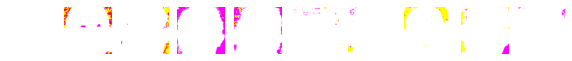

In [12]:
data_iter = iter(testloader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,10), ncols=10)
for ii in range(10):
    ax = axes[ii]
    print(type(images[ii]))
#     axy = cv2.cvtColor(images[ii], cv2.COLOR_BGR2LAB)
    imshow(images[ii], ax= ax,normalize=False)